# Getting the Data and Preprocessing

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', None)

In [2]:
df = pd.read_excel('FBRef 2020-21 T5 League Data.xlsx', sheet_name = 'with touch area percentiles')
df.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,Gls/Shot,Gls/SoT,AvgShotDist,FKSht/90,npxG/Shot,np:G-xG,PassCmp/90,PassAtt/90,PassCmp%,TotDistPass/90,PrgDistPass/90,ShortCmp/90,ShortAtt/90,ShortCmp%,MedCmp/90,MedAtt/90,MedCmp%,LongCmp/90,LongAtt/90,LongCmp%,KeyPass/90,PassIntoThird/90,PassIntoBox/90,CrossIntoBox/90,ProgPass/90,LivePassAtt/90,DeadPassAtt/90,FKPassAtt/90,TBCmp/90,PassUnderPress/90,Switches/90,Crosses/90,GroundPass/90,LowPass/90,HighPass/90,LeftPass/90,RightPass/90,HeadPass/90,ThrowPass/90,OtherPartPass/90,OffsidePass/90,OutOBPass/90,PassesInt/90,PassesBlk/90,SCA/90,PassLiveSCA/90,PassDeadSCA/90,DribSCA/90,ShSCA/90,FoulSCA/90,DefSCA/90,GCA/90,PassLiveGCA/90,PassDeadGCA/90,DribGCA/90,ShGCA/90,FoulGCA/90,DefGCA/90,TklAtt/90,TklW/90,Def 3rdTkl/90,Mid 3rdTkl/90,Att 3rdTkl/90,TklvDribW/90,TklvDribAtt/90,Tkl%vDrib,DribPast/90,PressAtt/90,SuccPress/90,PressSucc%,Def 3rdPress/90,Mid 3rdPress/90,Att 3rdPress/90,Blocks/90,ShotBlocks/90,PassBlk/90,Interceptions/90,Clearances/90,ErrToShot/90,Touches/90,Def PenTchs/90,Def 3rdTchs/90,Mid 3rdTchs/90,Att 3rdTchs/90,Att PenTchs/90,%TchsDefPen,%TchsDefThrd,%TchsMidThrd,%TchsAttThrd,%TchsAttPen,%iledefpen,%iledefthrd,%ilemidthrd,%ileattthrd,%ileattpen,LiveTchs/90,SuccDrib/90,AttDrib/90,DribSucc%,PlayersDribPast/90,Megs/90,Carries/90,TotDistCarry/90,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Aaron Connolly,ie IRL,FW,Brighton,eng Premier League,20,2000,17,9,791,8.8,0.11,0.23,0.34,0.02,0.40,0.42,2.61,0.91,34.8,0.09,0.25,13.7,0.00,0.15,-0.17,8.98,11.5,78.2,130.3,18.8,5.11,6.36,80.4,2.95,3.41,86.7,0.45,0.57,80.0,0.57,0.23,0.11,0.00,0.34,10.3,1.14,0.00,0.00,2.50,0.11,0.23,7.27,2.95,1.25,1.25,8.41,0.57,0.00,0.34,0.00,0.00,0.23,0.45,1.36,0.80,0.00,0.34,0.00,0.23,0.0,0.11,0.11,0.00,0.00,0.00,0.00,0.0,0.80,0.57,0.23,0.45,0.11,0.11,0.57,20.0,0.45,14.10,4.55,32.3,0.80,6.59,6.70,1.02,0.11,0.91,0.00,0.11,0.0,22.8,0.11,1.59,9.55,13.2,4.32,0.004825,0.069737,0.418860,0.578947,0.189474,0.102,0.071,0.220,0.949,0.975,21.7,0.91,1.14,80.0,0.91,0.00,14.1,74.4,44.0,1.93,0.91,0.45,3.30,1.70,40.6,16.3,40.1,7.50
1,Aaron Cresswell,eng ENG,DF,West Ham,eng Premier League,30,1989,36,36,3170,35.2,0.23,0.00,0.23,0.17,0.03,0.19,0.54,0.11,21.1,0.00,0.00,24.6,0.31,0.05,-0.03,43.80,58.5,74.8,877.4,419.4,18.60,20.90,89.1,17.50,20.90,83.7,7.16,14.70,48.6,1.70,4.23,0.68,0.48,3.41,45.9,12.60,2.93,0.06,4.46,2.39,2.59,31.40,10.40,16.80,45.70,3.35,1.39,7.36,0.11,0.65,0.99,1.36,1.87,2.73,1.36,1.16,0.03,0.11,0.06,0.0,0.40,0.14,0.17,0.00,0.06,0.03,0.0,0.88,0.37,0.43,0.40,0.06,0.40,0.97,41.2,0.57,6.53,1.90,29.1,3.47,2.56,0.51,1.36,0.40,0.97,1.02,2.81,0.0,65.5,5.17,21.80,29.90,16.9,0.51,0.078931,0.332824,0.456489,0.258015,0.007786,0.730,0.674,0.365,0.475,0.249,52.9,0.17,0.43,40.0,0.23,0.06,36.0,153.0,74.3,2.76,1.14,0.09,0.20,0.26,38.8,37.4,96.5,0.85
2,Aarón Escandell,es ESP,GK,Granada,es La Liga,24,1995,5,5,450,5.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.00,14.80,30.2,49.0,640.2,497.8,1.40,1.40,100.0,4.40,4.60,95.7,9.00,24.20,37.2,0.00,1.40,0.00,0.00,0.00,18.8,11.40,4.80,0.00,1.00,0.80,0.00,7.20,0.40,22.60,2.20,23.40,0.00,0.00,2.60,0.20,1.00,0.20,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.20,0.20,100.0,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.40,0.0,35.4,28.20,35.00,0.40,0.0,0.00,0.796610,0.988701,0.011299,0.000000,0.000000,0.933,0.935,0.067,0.000,0.000,24.0,0.00,0.00,NaN,0.00,0.00,13.8,87.6,65.0,0.00,0.00,0.00,0.00,0.00,10.8,10.8,100.0,0.00
3,Aaron Hickey,sco SCO,DF,Bologna,it Serie A,18,2002,11,10,758,8.4,0.00,0.00,0.00,0.04,0.01,0.05,0.36,0.12,33.3,0.00,0.00,28.1,0.12,0.03,-0.01,40.40,48.1,83.9,726.2,235.4,17.00,18.70,91.1,19.00,22.30,85.6,3.81,5.71,66.7,0.48,2.86,0.48,0.12,2.86,38.5,9.64,1.31,0.00,5.95,0.60,0.71,31.70,7.98,8.45,25.40,13.10,

In [3]:
df.columns.values

array(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Ast/90', 'npG/90', 'npG+A/90', 'xA/90',
       'npxG/90', 'npxG+xA/90', 'Shots/90', 'SoTs/90', 'SoT%', 'Gls/Shot',
       'Gls/SoT', 'AvgShotDist', 'FKSht/90', 'npxG/Shot', 'np:G-xG',
       'PassCmp/90', 'PassAtt/90', 'PassCmp%', 'TotDistPass/90',
       'PrgDistPass/90', 'ShortCmp/90', 'ShortAtt/90', 'ShortCmp%',
       'MedCmp/90', 'MedAtt/90', 'MedCmp%', 'LongCmp/90', 'LongAtt/90',
       'LongCmp%', 'KeyPass/90', 'PassIntoThird/90', 'PassIntoBox/90',
       'CrossIntoBox/90', 'ProgPass/90', 'LivePassAtt/90',
       'DeadPassAtt/90', 'FKPassAtt/90', 'TBCmp/90', 'PassUnderPress/90',
       'Switches/90', 'Crosses/90', 'GroundPass/90', 'LowPass/90',
       'HighPass/90', 'LeftPass/90', 'RightPass/90', 'HeadPass/90',
       'ThrowPass/90', 'OtherPartPass/90', 'OffsidePass/90',
       'OutOBPass/90', 'PassesInt/90', 'PassesBlk/90', 'SCA/90',
       'PassLiveSCA/90', 'PassDeadSCA/90',

In [4]:
df.describe()

,Age,Born,MP,Starts,Min,90s,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,Gls/Shot,Gls/SoT,AvgShotDist,FKSht/90,npxG/Shot,np:G-xG,PassCmp/90,PassAtt/90,PassCmp%,TotDistPass/90,PrgDistPass/90,ShortCmp/90,ShortAtt/90,ShortCmp%,MedCmp/90,MedAtt/90,MedCmp%,LongCmp/90,LongAtt/90,LongCmp%,KeyPass/90,PassIntoThird/90,PassIntoBox/90,CrossIntoBox/90,ProgPass/90,LivePassAtt/90,DeadPassAtt/90,FKPassAtt/90,TBCmp/90,PassUnderPress/90,Switches/90,Crosses/90,GroundPass/90,LowPass/90,HighPass/90,LeftPass/90,RightPass/90,HeadPass/90,ThrowPass/90,OtherPartPass/90,OffsidePass/90,OutOBPass/90,PassesInt/90,PassesBlk/90,SCA/90,PassLiveSCA/90,PassDeadSCA/90,DribSCA/90,ShSCA/90,FoulSCA/90,DefSCA/90,GCA/90,PassLiveGCA/90,PassDeadGCA/90,DribGCA/90,ShGCA/90,FoulGCA/90,DefGCA/90,TklAtt/90,TklW/90,Def 3rdTkl/90,Mid 3rdTkl/90,Att 3rdTkl/90,TklvDribW/90,TklvDribAtt/90,Tkl%vDrib,DribPast/90,PressAtt/90,SuccPress/90,PressSucc%,Def 3rdPress/90,Mid 3rdPress/90,Att 3rdPress/90,Blocks/90,ShotBlocks/90,PassBlk/90,Interceptions/90,Clearances/90,ErrToShot/90,Touches/90,Def PenTchs/90,Def 3rdTchs/90,Mid 3rdTchs/90,Att 3rdTchs/90,Att PenTchs/90,%TchsDefPen,%TchsDefThrd,%TchsMidThrd,%TchsAttThrd,%TchsAttPen,%iledefpen,%iledefthrd,%ilemidthrd,%ileattthrd,%ileattpen,LiveTchs/90,SuccDrib/90,AttDrib/90,DribSucc%,PlayersDribPast/90,Megs/90,Carries/90,TotDistCarry/90,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
count,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2280.000000,2280.000000,1915.000000,2280.000000,2810.000000,2280.000000,2810.000000,2810.000000,2810.000000,2806.000000,2810.000000,2810.00000,2810.000000,2810.000000,2778.000000,2810.000000,2810.000000,2761.000000,2810.000000,2810.000000,2693.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2475.000000,2810.000000,2810.000000,2810.000000,2715.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2809.000000,2809.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2368.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2803.000000,2810.000000
mean,25.269751,1994.386477,19.345552,14.287544,1282.789680,14.253416,0.081381,0.094107,0.175488,0.079178,0.112573,0.191769,1.102794,0.347915,30.088202,0.083412,0.276569,17.187588,0.037861,0.092417,-0.015459,34.921053,43.774434,77.781361,671.556868,212.72631,14.444292,16.555527,86.841289,14.845701,17.251448,83.634480,4.950918,8.164964,60.310991,0.759698,2.451231,0.697274,0.187776,2.801288,39.670900,4.102811,1.057235,0.070367,6.232181,1.184904,1.081057,29.849555,5.835851,8.090164,12.686014,25.913495,1.663028,1.860110,0.566292,0.138192,0.769278,0.950285,1.193288,1.725573,1.232391,0.139811,0.110117,0.089705,0.110409,0.043288,0.198406,0.135281,0.011858,0.012651,0.017075,0.015872,0.005701,1.611641,0.986623,0.768359,0.634527,0.208747,0.522698,1.547267,33.068121,1.024463,14.620815,4.163623,29.062210,4.556281,6.540046,3.524089,1.438135,0.271815,1.166409,0.944206,1.890691,0.023973,54.758292,5.176904,16.953886,26.614619,14.607662,2.13019

In [5]:
df.isna().sum().sort_values(ascending = False).head(16)

Gls/SoT              895
npxG/Shot            530
AvgShotDist          530
Gls/Shot             530
SoT%                 530
DribSucc%            442
Tkl%vDrib            335
LongCmp%             117
PressSucc%            95
MedCmp%               49
ShortCmp%             32
PassRec%               7
PassCmp%               4
Clearances/90          1
ErrToShot/90           1
PassUnderPress/90      0
dtype: int64

## 1. Passing Attributes

In [6]:
filtr = df.columns.str.contains('Pass')
passfilter = pd.DataFrame({'columns':df.columns,
             'filter': filtr}, index = df.columns)
passcols= [col for col in df.columns
       if passfilter.loc[col, 'filter'] == True]
passcols = passcols + ['ShortCmp/90', 'ShortAtt/90', 'ShortCmp%',
           'MedCmp/90', 'MedAtt/90', 'MedCmp%', 'LongCmp/90', 'LongAtt/90',
           'LongCmp%','CrossIntoBox/90', 'TBCmp/90','Switches/90', 'Crosses/90']

['PassCmp/90',
 'PassAtt/90',
 'PassCmp%',
 'TotDistPass/90',
 'PrgDistPass/90',
 'KeyPass/90',
 'PassIntoThird/90',
 'PassIntoBox/90',
 'ProgPass/90',
 'LivePassAtt/90',
 'DeadPassAtt/90',
 'FKPassAtt/90',
 'PassUnderPress/90',
 'GroundPass/90',
 'LowPass/90',
 'HighPass/90',
 'LeftPass/90',
 'RightPass/90',
 'HeadPass/90',
 'ThrowPass/90',
 'OtherPartPass/90',
 'OffsidePass/90',
 'OutOBPass/90',
 'PassesInt/90',
 'PassesBlk/90',
 'PassLiveSCA/90',
 'PassDeadSCA/90',
 'PassLiveGCA/90',
 'PassDeadGCA/90',
 'PassBlk/90',
 'PassTarget/90',
 'PassesReceived/90',
 'PassRec%',
 'ProgPassReceived/90',
 'ShortCmp/90',
 'ShortAtt/90',
 'ShortCmp%',
 'MedCmp/90',
 'MedAtt/90',
 'MedCmp%',
 'LongCmp/90',
 'LongAtt/90',
 'LongCmp%',
 'CrossIntoBox/90',
 'TBCmp/90',
 'Switches/90',
 'Crosses/90']

In [7]:
passcols = ['Player', 'Pos', 'Squad', 'Comp', 'Age', 'MP',
       'Starts', 'Min', '90s', 'Ast/90', 'xA/90'] + passcols

In [8]:
df[df['Player'] == 'Lionel Messi'][passcols]

,Player,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Ast/90,xA/90,PassCmp/90,PassAtt/90,PassCmp%,TotDistPass/90,PrgDistPass/90,KeyPass/90,PassIntoThird/90,PassIntoBox/90,ProgPass/90,LivePassAtt/90,DeadPassAtt/90,FKPassAtt/90,PassUnderPress/90,GroundPass/90,LowPass/90,HighPass/90,LeftPass/90,RightPass/90,HeadPass/90,ThrowPass/90,OtherPartPass/90,OffsidePass/90,OutOBPass/90,PassesInt/90,PassesBlk/90,PassLiveSCA/90,PassDeadSCA/90,PassLiveGCA/90,PassDeadGCA/90,PassBlk/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,ShortCmp/90,ShortAtt/90,ShortCmp%,MedCmp/90,MedAtt/90,MedCmp%,LongCmp/90,LongAtt/90,LongCmp%,CrossIntoBox/90,TBCmp/90,Switches/90,Crosses/90
1542,Lionel Messi,"FW,MF",Barcelona,es La Liga,33,35,33,3023,33.6,0.27,0.32,59.2,72.0,82.3,956.0,310.9,2.29,7.71,4.32,9.43,65.0,6.93,2.59,12.8,56.5,6.55,8.93,63.6,7.23,0.36,0.09,0.39,0.6,0.74,2.23,2.17,4.17,0.57,0.71,0.03,0.33,87.2,74.7,85.7,8.27,33.8,37.6,89.7,18.9,22.0,85.9,5.36,9.26,57.9,0.33,0.68,1.61,1.96


**For a good playmaker like Messi the Passing statistics that are important are:**

***Key involvement in Goals*-------->Ast/90, xA/90, KeyPass/90, PassLiveGCA/90, PassLiveSCA/90, PassDeadGCA/90, PassDeadSCA/90, CrossIntoBox/90, PassIntoBox/90, TBCmp/90**

***Offensive Passing*:--------->PassIntoThird/90, ProgPass/90**

***Receiver's end*:-------->PassTarget/90, PassesReceived/90, PassRec%, ProgPassReceived/90**

***General Passing Attributes*:------->PassCmp/90, PassAtt/90, PassCmp%**

In [9]:
playmakercols = ['Player', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Min', '90s', 'Ast/90', 'xA/90', 'KeyPass/90', \
                 'PassLiveGCA/90', 'PassLiveSCA/90', 'PassDeadGCA/90', 'PassDeadSCA/90', 'CrossIntoBox/90', 'PassIntoBox/90', \
                 'TBCmp/90', 'PassIntoThird/90', 'ProgPass/90', 'PassTarget/90', 'PassesReceived/90', 'PassRec%', \
                 'ProgPassReceived/90', 'PassCmp/90', 'PassAtt/90', 'PassCmp%']
dfpass = df[playmakercols] # atleast played 15 matches

In [10]:
dfpass.fillna(0, inplace = True)

In [11]:
dfpass.loc[:,'Ast/90':].head()

,Ast/90,xA/90,KeyPass/90,PassLiveGCA/90,PassLiveSCA/90,PassDeadGCA/90,PassDeadSCA/90,CrossIntoBox/90,PassIntoBox/90,TBCmp/90,PassIntoThird/90,ProgPass/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,PassCmp/90,PassAtt/90,PassCmp%
0,0.11,0.02,0.57,0.11,0.80,0.00,0.00,0.00,0.11,0.00,0.23,0.34,40.6,16.3,40.1,7.50,8.98,11.5,78.2
1,0.23,0.17,1.70,0.14,1.36,0.17,1.16,0.48,0.68,0.06,4.23,3.41,38.8,37.4,96.5,0.85,43.80,58.5,74.8
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.40,0.00,10.8,10.8,100.0,0.00,14.80,30.2,49.0
3,0.00,0.04,0.48,0.12,0.71,0.00,0.12,0.12,0.48,0.00,2.86,2.86,35.8,33.3,93.0,1.90,40.40,48.1,83.9
4,0.00,0.06,1.07,0.00,1.25,0.00,0.00,0.00,0.27,0.27,0.89,0.80,48.5,22.5,46.4,5.54,13.50,17.8,75.9


In [12]:
from sklearn.cluster import k_means

In [13]:
dfpass2 = dfpass.copy()
dfpass2['Pass cluster'] = k_means(dfpass.loc[:,'Ast/90':], n_clusters = 4)[1]

In [14]:
messi_cluster = dfpass2[dfpass2['Player'].str.contains('Lionel Messi')]['Pass cluster'].values
messi_cluster = messi_cluster.tolist()[0]

In [15]:
df.Pos.unique()

attacking_mid_pos = ['FW', 'MF', 'FW,MF', 'FW,DF', 'MF,FW', 'MF,DF', 'DF,MF', 'DF,FW']

In [16]:
dfpass2[(dfpass2['MP']>=15) & (dfpass2['Pass cluster']==messi_cluster) & (dfpass2['Age']<=25) & (dfpass2['Pos'].isin(attacking_mid_pos))].sort_values(by = 'xA/90', ascending = False).head(10)

,Player,Pos,Squad,Comp,Age,MP,Min,90s,Ast/90,xA/90,KeyPass/90,PassLiveGCA/90,PassLiveSCA/90,PassDeadGCA/90,PassDeadSCA/90,CrossIntoBox/90,PassIntoBox/90,TBCmp/90,PassIntoThird/90,ProgPass/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,PassCmp/90,PassAtt/90,PassCmp%,Pass cluster
385,Bruno Fernandes,MF,Manchester Utd,eng Premier League,25,37,3099,34.4,0.35,0.32,2.73,0.67,3.52,0.06,0.64,0.23,2.79,0.58,5.15,6.60,71.6,59.8,83.5,8.31,49.5,66.4,74.6,3
1110,Jadon Sancho,"FW,MF",Dortmund,de Bundesliga,20,26,2062,22.9,0.48,0.30,2.93,0.74,3.80,0.04,0.92,0.22,3.58,0.26,2.45,6.46,73.9,61.3,82.9,9.52,50.7,64.4,78.7,3
1344,Joshua Kimmich,MF,Bayern Munich,de Bundesliga,25,27,2194,24.4,0.41,0.27,2.75,0.45,2.95,0.25,1.56,0.33,2.38,0.45,8.77,9.43,72.0,68.0,94.4,2.50,73.4,87.3,84.0,3
2446,Sergej Milinković-Savić,MF,Lazio,it Serie A,25,32,2746,30.5,0.29,0.21,1.34,0.46,2.23,0.00,0.03,0.52,2.16,0.20,4.52,5.28,65.4,55.6,85.0,5.25,46.1,59.1,78.1,3
2134,Pedri,MF,Barcelona,es La Liga,17,37,2415,26.8,0.11,0.18,1.49,0.15,2.39,0.00,0.11,0.04,1.46,0.30,4.40,4.70,67.9,60.7,89.3,5.71,56.5,64.5,87.6,3
2753,Yacine Adli,MF,Bordeaux,fr Ligue 1,20,35,2418,26.9,0.19,0.18,1.97,0.22,2.53,0.04,0.33,0.15,0.89,0.37,5.50,5.24,58.0,53.8,92.9,1.23,50.0,60.6,82.6,3
2010,Nicolò Barella,MF,Inter,it Serie A,23,36,2896,32.2,0.22,0.17,1.46,0.34,2.58,0.00,0.03,0.34,2.11,0.22,4.91,6.89,58.5,53.1,90.8,4.69,49.8,60.1,83.0,3
882,Frenkie de Jong,"MF,DF",Barcelona,es La Liga,23,37,3154,35.0,0.11,0.16,1.40,0.17,2.14,0.00,0.06,0.06,0.97,0.23,6.49,5.31,79.2,73.4,92.7,3.91,74.2,80.9,91.8,3
2750,Xeka,MF,Lille,fr Ligue 1,25,33,1200,13.3,0.15,0.16,1.35,0.15,2.03,0.00,0.53,0.00,0.68,0.15,6.54,4.89,61.6,57.1,92.8,1.80,58.9,66.2,88.9,3
343,Bernardo Silva,"MF,FW",Manchester City,eng Premier League,25,26,2065,22.9,0.26,0.16,1.40,0.39,2.79,0.00,0.09,0.00,1.40,0.04,3.54,3.14,65.8,57.2,86.9,4.93,55.9,62.3,89.7,3


Text(0.5, 1.0, 'Elbow Plot')

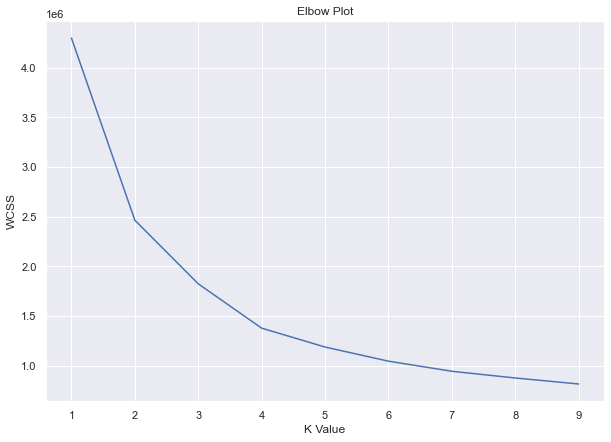

In [17]:
# ELBOW METHOD
wcss = []
k = list(range(1,10))

for i in k:
    km = k_means(dfpass.loc[:,'Ast/90':], n_clusters = i)
    wcss.append(km[2])
plt.figure(figsize = (10,7))
sns.set(style = 'darkgrid')
plt.plot(k, wcss)
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.title('Elbow Plot')

For clusters = 2
    The avg. silhouette score = 0.3712467987414254
For clusters = 3
    The avg. silhouette score = 0.3451229872258889
For clusters = 4
    The avg. silhouette score = 0.3659951763075065
For clusters = 5
    The avg. silhouette score = 0.31425556053177633
For clusters = 6
    The avg. silhouette score = 0.30341393910107506
For clusters = 7
    The avg. silhouette score = 0.31237309919963036
For clusters = 8
    The avg. silhouette score = 0.3086125172734735
For clusters = 9
    The avg. silhouette score = 0.2719954295162642


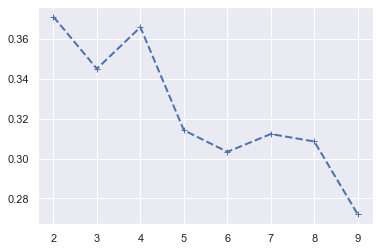

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil_score = []
k = list(range(2,10))
for i in k:
    km = k_means(dfpass.loc[:,'Ast/90':], n_clusters = i)
    labels = km[1]
    silh_avg = silhouette_score(dfpass.loc[:,'Ast/90':], labels)
    sil_score.append(silh_avg)
    print('''For clusters = {}
    The avg. silhouette score = {}'''.format(i, silh_avg))

plt.plot(k ,sil_score, 'b+', linewidth=2, linestyle='dashed')
    

    

## 2. Goal Creation Ability

***Direct Goals Stats*------> 'Ast/90', 'npG/90', 'npG+A/90', 'xA/90', 'npxG/90', 'npxG+xA/90', 'Gls/Shot', 'Gls/SoT', 'npxG/Shot', 'np:G-xG'**

***Shots Stats*------> 'Shots/90', 'SoTs/90', 'SoT%'**

***Involvement in Attack*-----> 'SCA/90', 'GCA/90', 'ShSCA/90', 'ShGCA/90'**

In [19]:
chancescols = ['Ast/90', 'npG/90', 'npG+A/90', 'xA/90',
       'npxG/90', 'npxG+xA/90', 'Shots/90', 'SoTs/90', 'SoT%', 'Gls/Shot',
       'Gls/SoT', 'npxG/Shot', 'np:G-xG', 'SCA/90', 'GCA/90', 'ShSCA/90', 'ShGCA/90']

In [20]:
chancescols = ['Player', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Min', '90s'] + chancescols

In [21]:
dfchances = df[chancescols].fillna(0)
dfchances.head()

,Player,Pos,Squad,Comp,Age,MP,Min,90s,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,Gls/Shot,Gls/SoT,npxG/Shot,np:G-xG,SCA/90,GCA/90,ShSCA/90,ShGCA/90
0,Aaron Connolly,FW,Brighton,eng Premier League,20,17,791,8.8,0.11,0.23,0.34,0.02,0.40,0.42,2.61,0.91,34.8,0.09,0.25,0.15,-0.17,1.36,0.11,0.00,0.00
1,Aaron Cresswell,DF,West Ham,eng Premier League,30,36,3170,35.2,0.23,0.00,0.23,0.17,0.03,0.19,0.54,0.11,21.1,0.00,0.00,0.05,-0.03,2.73,0.40,0.11,0.06
2,Aarón Escandell,GK,Granada,es La Liga,24,5,450,5.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Aaron Hickey,DF,Bologna,it Serie A,18,11,758,8.4,0.00,0.00,0.00,0.04,0.01,0.05,0.36,0.12,33.3,0.00,0.00,0.03,-0.01,0.83,0.12,0.00,0.00
4,Aaron Leya Iseka,FW,Metz,fr Ligue 1,22,21,1008,11.2,0.00,0.18,0.18,0.06,0.21,0.28,1.61,0.54,33.3,0.11,0.33,0.13,-0.04,1.88,0.09,0.00,0.00


Text(0.5, 1.0, 'Elbow Plot')

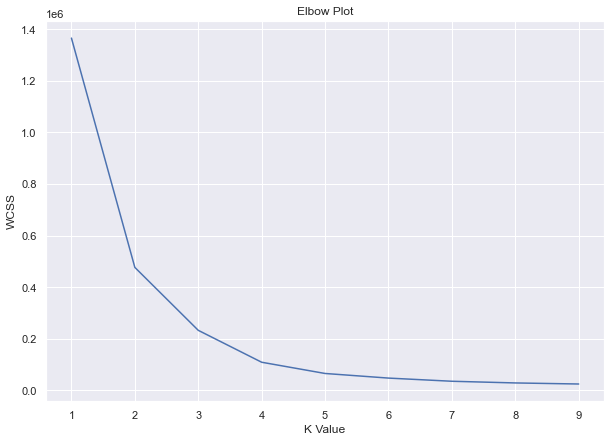

In [22]:
dfchances2 = dfchances.copy()
wcss = []
k = list(range(1,10))

for i in k:
    km = k_means(dfchances2.loc[:,'Ast/90':], n_clusters = i)
    wcss.append(km[2])
plt.figure(figsize = (10,7))
sns.set(style = 'darkgrid')
plt.plot(k, wcss)
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.title('Elbow Plot')

For clusters = 2
    The avg. silhouette score = 0.6168890524399946
For clusters = 3
    The avg. silhouette score = 0.6573064946748742
For clusters = 4
    The avg. silhouette score = 0.6260063145871724
For clusters = 5
    The avg. silhouette score = 0.6204667071526989
For clusters = 6
    The avg. silhouette score = 0.6171865713188075
For clusters = 7
    The avg. silhouette score = 0.6028029326736809
For clusters = 8
    The avg. silhouette score = 0.5955303265054446
For clusters = 9
    The avg. silhouette score = 0.5792310689354353


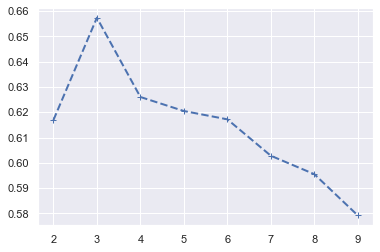

In [23]:
sil_score = []
k = list(range(2,10))
for i in k:
    km = k_means(dfchances2.loc[:,'Ast/90':], n_clusters = i)
    labels = km[1]
    silh_avg = silhouette_score(dfchances2.loc[:,'Ast/90':], labels)
    sil_score.append(silh_avg)
    print('''For clusters = {}
    The avg. silhouette score = {}'''.format(i, silh_avg))

plt.plot(k ,sil_score, 'b+', linewidth=2, linestyle='dashed')

**Optimum K is 3**

In [24]:
dfchances2['Chances cluster'] = k_means(dfchances2.loc[:,'Ast/90':], n_clusters = 3)[1]
messi_cluster_chances = dfchances2[dfchances2['Player'].str.contains('Lionel Messi')]['Chances cluster'].values
messi_cluster_chances = messi_cluster_chances.tolist()[0]

In [25]:
dfchances2[(dfchances2['MP']>=15) & (dfchances2['Chances cluster']==messi_cluster_chances) & (dfchances2['Age']<=25) & (dfchances2['Pos'].isin(attacking_mid_pos))].sort_values(by = 'npxG+xA/90', ascending = False).head(10)

,Player,Pos,Squad,Comp,Age,MP,Min,90s,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,Gls/Shot,Gls/SoT,npxG/Shot,np:G-xG,SCA/90,GCA/90,ShSCA/90,ShGCA/90,Chances cluster
749,Erling Haaland,FW,Dortmund,de Bundesliga,20,28,2407,26.7,0.22,0.93,1.16,0.20,0.77,0.97,3.37,1.76,52.2,0.28,0.53,0.23,0.17,2.32,0.60,0.34,0.07,0
1495,Kylian Mbappé,FW,Paris S-G,fr Ligue 1,21,31,2380,26.4,0.26,0.79,1.06,0.18,0.76,0.93,3.71,1.78,48.0,0.21,0.45,0.20,0.03,4.05,1.06,0.27,0.08,0
1247,Joel Pohjanpalo,FW,Union Berlin,de Bundesliga,25,19,851,9.5,0.00,0.63,0.63,0.15,0.73,0.87,3.26,1.58,48.4,0.19,0.40,0.22,-0.09,1.58,0.21,0.21,0.11,0
68,Alberto Cerri,FW,Cagliari,it Serie A,24,23,369,4.1,0.00,0.24,0.24,0.20,0.61,0.82,3.90,1.46,37.5,0.06,0.17,0.16,-0.37,5.37,0.49,0.98,0.24,0
2798,Yusuf Yazıcı,"FW,MF",Lille,fr Ligue 1,23,32,1086,12.1,0.33,0.58,0.91,0.34,0.46,0.81,3.72,1.65,44.4,0.16,0.35,0.12,0.12,5.04,0.58,0.08,0.00,0
901,Gastón Pereiro,"MF,FW",Cagliari,it Serie A,25,15,272,3.0,0.66,0.66,1.32,0.24,0.57,0.81,4.67,1.67,35.7,0.14,0.40,0.12,0.10,4.67,0.67,1.00,0.33,0
183,André Silva,FW,Eint Frankfurt,de Bundesliga,24,32,2760,30.7,0.23,0.68,0.91,0.18,0.62,0.80,3.49,1.73,49.5,0.20,0.40,0.18,0.07,2.48,0.46,0.26,0.10,0
317,Bartosz Bialek,"FW,MF",Wolfsburg,de Bundesliga,18,19,270,3.0,0.00,0.67,0.67,0.08,0.69,0.77,3.00,1.67,55.6,0.22,0.40,0.23,-0.03,3.33,0.67,0.00,0.00,0
1180,Jean-Philippe Mateta,FW,Mainz 05,de Bundesliga,23,15,997,11.1,0.09,0.54,0.63,0.13,0.60,0.74,2.43,1.17,48.1,0.22,0.46,0.25,-0.06,2.25,0.36,0.00,0.00,0
2682,Victor Osimhen,FW,Napoli,it Serie A,21,24,1573,17.5,0.17,0.57,0.74,0.15,0.59,0.74,3.66,1.49,40.6,0.16,0.38,0.16,-0.02,3.43,0.40,0.17,0.06,0


In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(dfpass.loc[:,'Ast/90':])
pca_pass_data = pca.transform(dfpass.loc[:,'Ast/90':])

In [27]:
pca_pass_x = []
pca_pass_y = []
for row in pca_pass_data:
    pca_pass_x.append(row[0])
    pca_pass_y.append(row[1])

In [28]:
pca_pass_df = pd.DataFrame({'Player':dfpass['Player'],
             'Pos':dfpass['Pos'],
             'Squad':dfpass['Squad'],
             'Comp':dfpass['Comp'],
             'Age':dfpass['Age'],
             'MP':dfpass['MP'],
             'pca_pass_x':pca_pass_x,
             'pca_pass_y':pca_pass_y,
            'pass cluster':dfpass2['Pass cluster']})
pca_pass_df.head()

,Player,Pos,Squad,Comp,Age,MP,pca_pass_x,pca_pass_y,pass cluster
0,Aaron Connolly,FW,Brighton,eng Premier League,20,17,-53.191220,29.576075,1
1,Aaron Cresswell,DF,West Ham,eng Premier League,30,36,14.870683,-14.281213,2
2,Aarón Escandell,GK,Granada,es La Liga,24,5,-41.191382,-32.855209,0
3,Aaron Hickey,DF,Bologna,it Serie A,18,11,5.333976,-14.407333,2
4,Aaron Leya Iseka,FW,Metz,fr Ligue 1,22,21,-40.482627,30.486951,1


In [29]:
pca.fit(dfchances.loc[:,'Ast/90':])
pca_chances_data = pca.transform(dfchances.loc[:,'Ast/90':])

In [30]:
pca_chances_x = []
pca_chances_y = []
for row in pca_chances_data:
    pca_chances_x.append(row[0])
    pca_chances_y.append(row[1])

In [31]:
pca_chances_df = pd.DataFrame({'Player':dfchances['Player'],
             'Pos':dfchances['Pos'],
             'Squad':dfchances['Squad'],
             'Comp':dfchances['Comp'],
             'Age':dfchances['Age'],
             'MP':dfchances['MP'],
             'pca_chances_x':pca_chances_x,
             'pca_chances_y':pca_chances_y,
            'chances cluster':dfchances2['Chances cluster']})
pca_chances_df.head()

,Player,Pos,Squad,Comp,Age,MP,pca_chances_x,pca_chances_y,chances cluster
0,Aaron Connolly,FW,Brighton,eng Premier League,20,17,10.411848,0.056058,0
1,Aaron Cresswell,DF,West Ham,eng Premier League,30,36,-3.308731,0.795508,0
2,Aarón Escandell,GK,Granada,es La Liga,24,5,-24.458060,-1.505325,1
3,Aaron Hickey,DF,Bologna,it Serie A,18,11,8.849961,-1.359440,0
4,Aaron Leya Iseka,FW,Metz,fr Ligue 1,22,21,8.897792,0.129269,0


In [32]:
dffinal = pd.merge(pca_pass_df, pca_chances_df, on = ['Player', 'Pos', 'Squad', 'Comp', 'Age', 'MP'])

## 3. Dribbles, Carries and Miscalleneous 

In [33]:
drib = pd.DataFrame()
drib['col'] = df.columns
drib['drib'] = df.columns.str.contains('Drib')

In [34]:
drib[drib['drib'] == True]['col'].values

array(['DribSCA/90', 'DribGCA/90', 'TklvDribW/90', 'TklvDribAtt/90',
       'Tkl%vDrib', 'DribPast/90', 'SuccDrib/90', 'AttDrib/90',
       'DribSucc%', 'PlayersDribPast/90'], dtype=object)

***Dribbling Ability:*----> 'DribSCA/90', 'DribGCA/90', 'DribPast/90', 'SuccDrib/90', 'AttDrib/90', 'DribSucc%','PlayersDribPast/90'**

***Carrying Ability:*-----> 'Carries/90', 'TotDistCarry/90', 'PrgDistCarry/90', 'ProgCarry/90', 'CarryIntoThird/90', 'CarryIntoBox/90'**

***Pressing:* -----> 'PressAtt/90', 'SuccPress/90', 'PressSucc%', 'Mid 3rdPress/90', 'Att 3rdPress/90', 'Switches/90'**

***Errors:* -----> 'Miscontrol/90', 'Dispossessed/90'**

***Touches:* -----> 'Touches/90', '%TchsMidThrd', '%TchsAttThrd', '%TchsAttPen'**

In [35]:
misccols = ['DribSCA/90', 'DribGCA/90', 'DribPast/90', 'SuccDrib/90', 'AttDrib/90', 'DribSucc%','PlayersDribPast/90', \
           'Carries/90', 'TotDistCarry/90', 'PrgDistCarry/90', 'ProgCarry/90', 'CarryIntoThird/90', 'CarryIntoBox/90', \
           'PressAtt/90', 'SuccPress/90', 'PressSucc%', 'Mid 3rdPress/90', 'Att 3rdPress/90', 'Switches/90', \
           'Miscontrol/90', 'Dispossessed/90', 'Touches/90', '%TchsMidThrd', '%TchsAttThrd', '%TchsAttPen']
misccols = ['Player', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Min', '90s'] + misccols

In [36]:
dfmisc = df[misccols]
dfmisc.fillna(0, inplace = True)

Text(0.5, 1.0, 'Elbow Plot')

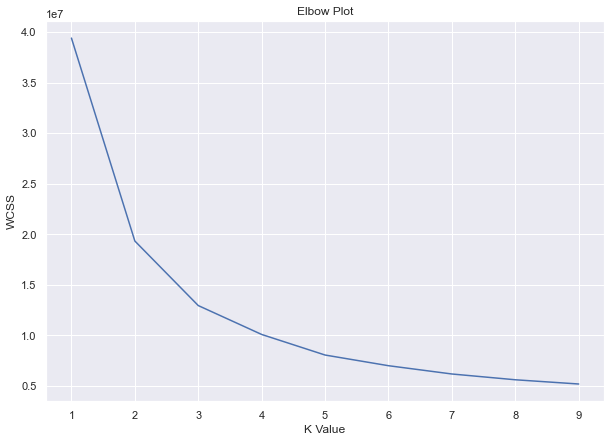

In [37]:
dfmisc2 = dfmisc.copy()
wcss = []
k = list(range(1,10))

for i in k:
    km = k_means(dfmisc2.loc[:,'DribSCA/90':], n_clusters = i)
    wcss.append(km[2])
plt.figure(figsize = (10,7))
sns.set(style = 'darkgrid')
plt.plot(k, wcss)
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.title('Elbow Plot')

For clusters = 2
    The avg. silhouette score = 0.4527911255051422
For clusters = 3
    The avg. silhouette score = 0.42948368381768104
For clusters = 4
    The avg. silhouette score = 0.37156666099777325
For clusters = 5
    The avg. silhouette score = 0.3527232631421929
For clusters = 6
    The avg. silhouette score = 0.3099411693021597
For clusters = 7
    The avg. silhouette score = 0.3110047916929461
For clusters = 8
    The avg. silhouette score = 0.27826763916982367
For clusters = 9
    The avg. silhouette score = 0.2803724320427397


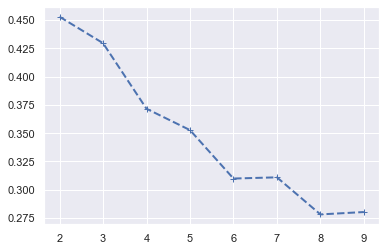

In [38]:
sil_score = []
k = list(range(2,10))
for i in k:
    km = k_means(dfmisc2.loc[:,'DribSCA/90':], n_clusters = i)
    labels = km[1]
    silh_avg = silhouette_score(dfmisc2.loc[:,'DribSCA/90':], labels)
    sil_score.append(silh_avg)
    print('''For clusters = {}
    The avg. silhouette score = {}'''.format(i, silh_avg))

plt.plot(k ,sil_score, 'b+', linewidth=2, linestyle='dashed')

In [39]:
dfmisc2['misc cluster'] = k_means(dfmisc2.loc[:,'DribSCA/90':], n_clusters = 3)[1]
messi_cluster_misc = dfmisc2[dfmisc2['Player'].str.contains('Lionel Messi')]['misc cluster'].values
messi_cluster_misc = messi_cluster_misc.tolist()[0]

In [40]:
dfmisc2[(dfmisc2['MP']>=15) & (dfmisc2['misc cluster']==messi_cluster_misc) & (dfmisc2['Age']<=25) &  \
        (dfmisc2['Pos'].isin(attacking_mid_pos))].sort_values(by = 'DribSCA/90', ascending = False).head(10)

,Player,Pos,Squad,Comp,Age,MP,Min,90s,DribSCA/90,DribGCA/90,DribPast/90,SuccDrib/90,AttDrib/90,DribSucc%,PlayersDribPast/90,Carries/90,TotDistCarry/90,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,PressAtt/90,SuccPress/90,PressSucc%,Mid 3rdPress/90,Att 3rdPress/90,Switches/90,Miscontrol/90,Dispossessed/90,Touches/90,%TchsMidThrd,%TchsAttThrd,%TchsAttPen,misc cluster
1158,Javier Ontiveros,"FW,MF",Huesca,es La Liga,22,20,918,10.2,1.18,0.10,2.16,4.12,6.27,65.6,4.51,51.4,347.8,206.9,12.10,3.53,1.57,18.0,5.00,27.7,8.82,3.73,2.06,1.37,1.76,61.7,0.544571,0.408428,0.050891,1
31,Adama Traoré,FW,Wolves,eng Premier League,24,37,2649,29.4,0.71,0.03,0.37,5.44,7.31,74.4,5.88,38.8,292.4,193.2,10.40,2.93,2.04,11.8,3.64,30.9,6.29,2.82,0.61,2.86,2.89,44.8,0.511161,0.517857,0.088839,1
1467,Kingsley Coman,"FW,MF",Bayern Munich,de Bundesliga,24,29,1752,19.5,0.62,0.15,0.97,3.38,5.28,64.1,3.59,48.5,278.8,161.5,10.30,1.85,2.41,16.4,5.23,31.9,6.82,6.72,1.49,2.36,2.56,58.7,0.328790,0.642249,0.126746,1
2376,Sada Thioub,"FW,MF",Angers,fr Ligue 1,25,27,1256,14.0,0.57,0.00,1.29,2.71,5.00,54.3,2.86,47.1,289.9,172.7,9.29,2.86,0.79,21.3,6.57,30.9,8.79,6.86,0.79,2.93,3.07,58.1,0.506024,0.428571,0.067642,1
1016,Houssem Aouar,"MF,FW",Lyon,fr Ligue 1,22,30,1781,19.8,0.56,0.05,1.01,2.53,4.34,58.1,2.78,51.6,269.0,173.2,8.74,2.47,1.36,13.6,4.04,29.7,6.57,5.05,0.86,1.92,2.73,65.6,0.544207,0.460366,0.105488,1
2073,Ousmane Dembélé,"FW,DF",Barcelona,es La Liga,23,30,1774,19.7,0.51,0.05,0.46,3.76,6.09,61.7,4.01,53.9,323.6,211.4,13.20,3.71,2.89,14.5,3.30,22.8,5.89,6.90,1.42,2.54,1.47,65.3,0.346095,0.686064,0.119755,1
1110,Jadon Sancho,"FW,MF",Dortmund,de Bundesliga,20,26,2062,22.9,0.48,0.04,0.48,3.97,7.12,55.8,4.19,61.7,327.6,188.6,10.40,3.54,2.23,11.1,4.06,36.5,4.54,4.89,1.22,2.53,1.79,78.2,0.402813,0.594629,0.074808,1
2143,Pedro Neto,"FW,MF",Wolves,eng Premier League,20,31,2550,28.3,0.46,0.04,0.88,2.61,4.31,60.7,2.79,41.3,292.5,178.8,9.65,3.18,1.91,11.8,3.36,28.5,5.16,3.67,2.01,2.54,2.08,55.2,0.460145,0.547101,0.071014,1
2693,Vinicius Júnior,FW,Real Madrid,es La Liga,20,35,1969,21.9,0.41,0.05,1.64,2.74,5.02,54.5,2.88,44.9,271.7,188.0,9.18,3.61,1.83,20.3,5.43,26.7,7.99,7.35,0.50,2.92,2.10,53.5,0.383178,0.620561,0.127103,1
1199,Jeremy Doku,"MF,FW",Rennes,fr Ligue 1,18,30,2313,25.7,0.39,0.00,0.82,3.46,5.95,58.2,4.09,47.8,285.8,184.7,10.80,2.61,1.56,17.1,5.29,31.0,7.24,6.50,0.66,2.68,3.04,53.0,0.413208,0.601887,0.096226,1


In [41]:
pca.fit(dfmisc.loc[:,'DribSCA/90':])
pca_misc_data = pca.transform(dfmisc.loc[:,'DribSCA/90':])

In [42]:
pca_misc_x = []
pca_misc_y = []
for row in pca_misc_data:
    pca_misc_x.append(row[0])
    pca_misc_y.append(row[1])

In [43]:
pca_misc_df = pd.DataFrame({'Player':dfmisc['Player'],
             'Pos':dfmisc['Pos'],
             'Squad':dfmisc['Squad'],
             'Comp':dfmisc['Comp'],
             'Age':dfmisc['Age'],
             'MP':dfmisc['MP'],
             'pca_misc_x':pca_misc_x,
             'pca_misc_y':pca_misc_y,
            'misc cluster':dfmisc2['misc cluster']})
pca_misc_df.head()

,Player,Pos,Squad,Comp,Age,MP,pca_misc_x,pca_misc_y,misc cluster
0,Aaron Connolly,FW,Brighton,eng Premier League,20,17,-116.590978,-33.638599,0
1,Aaron Cresswell,DF,West Ham,eng Premier League,30,36,-30.373280,8.354185,2
2,Aarón Escandell,GK,Granada,es La Liga,24,5,-97.132265,43.102595,0
3,Aaron Hickey,DF,Bologna,it Serie A,18,11,54.667494,0.913427,2
4,Aaron Leya Iseka,FW,Metz,fr Ligue 1,22,21,-118.754844,-15.168280,0


In [44]:
dffinal = pd.merge(dffinal, pca_misc_df, on = ['Player', 'Pos', 'Squad', 'Comp', 'Age', 'MP'])
dffinal.head()

,Player,Pos,Squad,Comp,Age,MP,pca_pass_x,pca_pass_y,pass cluster,pca_chances_x,pca_chances_y,chances cluster,pca_misc_x,pca_misc_y,misc cluster
0,Aaron Connolly,FW,Brighton,eng Premier League,20,17,-53.191220,29.576075,1,10.411848,0.056058,0,-116.590978,-33.638599,0
1,Aaron Cresswell,DF,West Ham,eng Premier League,30,36,14.870683,-14.281213,2,-3.308731,0.795508,0,-30.373280,8.354185,2
2,Aarón Escandell,GK,Granada,es La Liga,24,5,-41.191382,-32.855209,0,-24.458060,-1.505325,1,-97.132265,43.102595,0
3,Aaron Hickey,DF,Bologna,it Serie A,18,11,5.333976,-14.407333,2,8.849961,-1.359440,0,54.667494,0.913427,2
4,Aaron Leya Iseka,FW,Metz,fr Ligue 1,22,21,-40.482627,30.486951,1,8.897792,0.129269,0,-118.754844,-15.168280,0


In [45]:
dffinal.to_csv('Final.csv', index = False)